<a href="https://colab.research.google.com/github/Avinash10000/code_for_all_part_in_project/blob/main/testing_rewrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Avinash10000/waste-classifier

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


created ./trained.models/
created ./model_history/
created ./processed_datasets/
created ./test_classfiy/
***GFC path: /content/gdrive/MyDrive/Images/train_recycling/
***GFC folders: ['/content/gdrive/MyDrive/Images/train_recycling/train_recycling_images']
***GFC classes:  ['train_recycling']
***GFC path: /content/gdrive/MyDrive/Images/train_recycling/
***GFC folders: ['/content/gdrive/MyDrive/Images/train_recycling/train_recycling_images']
***GFC classes:  ['train_recycling']
***GFC path: /content/gdrive/MyDrive/Images/test_recycling/
***GFC folders: ['/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images']
***GFC classes:  ['test_recycling']
***GFC path: /content/gdrive/MyDrive/Images/test_recycling/
***GFC folders: ['/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images']
***GFC classes:  ['test_recycling']
PATH FOR TO H5PY: /content/gdrive/MyDrive/Images/test_recycling/
H5PY FOLDERS: ['/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:255: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


THE IMAGES IN THIS FOLDER ARE: ['/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard1.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard10.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard100.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard101.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard102.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard103.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard104.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard105.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard106.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard107.jpg', '/content/gdrive/MyDrive/Images/test_recycling/test_recycling_images/cardboard108.jpg', '/c

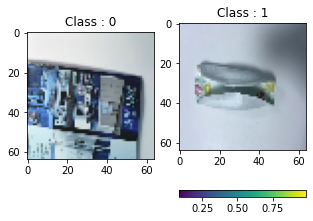

DisabledFunctionError: ignored

In [2]:
 
'''decalre image properties'''
IMG_WIDTH = 64
IMG_HEIGHT = 64
CHANNELS=3
preprocess_images = ()
'''declare some training hyperparameters'''
BATCH_SIZE = 50
EPOCHS = 100
import pdb
import cv2
import numpy as np 
from glob import glob
import matplotlib.pyplot as plt
import sys
from PIL import Image
import os
import random
import keras
from keras.utils import to_categorical
import h5py
import json
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import json
import sklearn.datasets

from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2

#declare the directories that hold the training and test dat
#train_dir= 
train_dir ='/content/gdrive/MyDrive/Images/train_recycling/'
#'/content/gdrive/MyDrive/Images/train_recycling/'
test_dir ='/content/gdrive/MyDrive/Images/test_recycling/'
#'./content/gdrive/MyDrive/Images/testing_the_non_recycling/'
# copy both paths then provide alterate paths with folders for each class(metal,glass,paper etc) and see what happens
#strip the folder name from a path

def get_end_slash(f):
  return f[f.rindex("/",0,f.rindex("/"))+1:f.rindex("/")]

#strip the picture name from a path
def get_pic_name(f):
  return f[f.rindex("/")+1:]

#get the parent directory

def get_leading_directory(f):
  return f[:f.rindex("/")+1]

#normalize the inputs
def scale_X(X):
  return X/255.0

#method to get list of folders and classes in directory

def get_folders_and_classes(pth):
  print("***GFC path:",pth)
  folders=glob(pth+"*")
  print("***GFC folders:",folders)
  classes=[get_end_slash(f) for f in folders]
  print("***GFC classes: ",classes)
  return(folders, classes)
'''
display a couple images in the dataset to check if it turned out as expected
Input: inputs and labels 
Output: plots to a matplotlib plot, type plt.show() or uncomment last line of method
        to show images
'''
  
def display_data(X,y):
  plt.figure(figsize=[5,5])
  # Display the first image in data
  plt.subplot(121)
  plt.imshow(X[0,:,:])
  plt.title("Class : {}".format(y[0]))
  #Display the second image 
  plt.subplot(122)
  plt.imshow(X[1,:,:])
  plt.title("Class : {}".format(y[1]))
  plt.colorbar(orientation="horizontal")
  plt.show()

'''
load the dataster from a h5py file given filename
input: filename
output:(X,y,y_one_hot, classes)
'''


def load_dataset_from_file(fname):
  dataset= np.load(fname)
  return (dataset[0], dataset[1], dataset[2], dataset[3])

'''
filter new images addes, converting non jpg images, and naming them to a genetic enumerated name to jpg and removing the images that cannot be opened by opencv must be given the path and the subdirectories desired to filter input: pth - string of path to images(in formsat "./path/") subdirs - list of subdirectory names to filter or 'all'
'''





def filter_new_images(pth, subdirs):
  #get list of folders and classes

  (folders, classes) = get_folders_and_classes(pth)
  #iterate through the folders

 
  for i, folder in enumerate(folders):
    curr_class=classes[i]
    #if the current class is not in the subdirectory list, skip it

    if (curr_class not in subdirs and subdirs!="all"):
      continue 

    #convert pngs and other types to jpgs

    images=[]
    im_types = ['png','jpeg','gif','JPG', 'svg', 'ashx','Jpg']
    for im_type in im_types:
      images = images + glob(folder+"*."+im_type)
    for image in images:
        #try to open the image to convert it and if it can't be converted, delete it
        try:
            im=Image.open(image)
            jpg=im.convert('RGB')
            pname = image[:image.rindex(".")]+'jpg'
            if pname!= image:
                os.remove(image)
                jpg.save(pname)
                print(pname)
        except:
         print("could not open/convert image", image)
         os.remove(image)

    #make sure jpgs can be opened properly by opencv
    images_jpg = glob(folder+"*.jpg")
    for images in images_jpg:
      try:
        img = cv2.imread(image)
        img.shape
      except:
        os.remove(image)
        print(curr_class,get_pic_name(image), "failed to load in opencv and was deleted")
    
    
    #rename all jpgs to classname + number
    images_jpg= glob(folder+"*.jpg")

    #store in temporary directory in case that name exists in present directory 

    temp_dir = folder+"temp/"
    if not os.path.exists(temp_dir):
      os.makedirs(temp_dir) 
    for j,image in enumerate(images_jpg):
      new_name= get_leading_directory(image) +"temp/"+curr_class+str(j)+".jpg"
      os.rename(image, new_name)

    #move it back to the previous directory and remove temporary directory
    images_temp_dir = glob(temp_dir+"*.jpg")
    for j,image in enumerate(images_temp_dir):
      upper_dir = folder + curr_class+str(j)+".jpg"
      os.rename(image, upper_dir)
      print(upper_dir, "processed")
    os.rmdir(temp_dir)
'''
Takes a random proportion of images in the train path and puts it in the test path
input: train_pth - string of path containing the train images (in format "./path/")
        test_pth - string of path containing the test images (in format "./path/")
        subdirs - list of subdirectories you want to split or string "all"
        proportion - float between 0 and 1
'''
def split_train_test(train_pth, test_pth, subdirs, proportion):
      if proportion>1 or proportion<0:
        print("incorrect value for proportion entered")
        return
    
    #get list of folders and classes
      (folders,classes ) = get_folders_and_classes(train_pth)
      
    #iterate through folders
      for i, folder in enumerate(folders):
        curr_class = classes[i]
        print("current class is"+curr_class)
        #if the current class not in subdirectory list skip it
        if(curr_class not in subdirs and subdirs!="all"):
            continue
       
        
        #make the appropriate directories in the test path if they don't already exist
        new_dir = test_pth + curr_class + "/"
        print("new_dir is"+new_dir)
        os.makedirs(os.path.dirname(new_dir), exist_ok=True)

        #get a list of all the images and pick out a random sample from the images
        images = glob(folder+"*.jpg")
        len_of_the_images= len(images)
        print('len_of_the_images is equal to'+str(len_of_the_images))
        rand_samp = random.sample(images,int(proportion*len(images)))
    #print("Current Class: "+curr_class, len(rand_samp), len(images))         
             
        #relocate all the images randomly chosen
        for image in rand_samp:
            new_im_loc = new_dir + get_pic_name(image)
            os.rename(image, new_im_loc)
        
   #output the new number of images in the particular folder     
        print("new_train_len",len(glob(folder+"*.jpg"))) 

'''
Converts all the images in a given path to a series of numpy arrays that are resized to the size specified
in constants.py + the correct number of channels. Also normalizes the pixel values to be between 0 and 1
and saves the images in an h5py file
input: pth - string of path containing the train images (in format "./path/")
'''


def to_h5py(pth):
  #get list of folders and classes

  (folders,classes)= get_folders_and_classes(pth)
  print("PATH FOR TO H5PY:",pth)
  print("H5PY FOLDERS:",folders)
  print("H5PY CLASSES:",classes)

   #set the file name that the dataset will be saved under
  

  input_fname = 'processed_datasets/' +get_end_slash(pth)
  #checks if this particular file already exists and asks the user if it should be overwritten
  

  if (os.path.isfile(input_fname)):
    inp= input('overwrite file' + input_fname + '?, y/n')
    if inp.lower()=="y":
      print("file will be overwritten")
      os.remove(input_fname)
    elif inp.lower()=="n":
      input_fname = input("enter a new filename: ") + '.h5' 
      print(input_fname)
    else:
      print("incorrect input, preprocessing failed")
      return
  
  #create h5py file to store dataset
  hf=h5py.File(input_fname)
  #get list of all images and number of images


  all_images = glob(pth+"**/*.jpg", recursive=True)
  print("THE IMAGES IN THIS FOLDER ARE:",all_images)
  n_images = len(all_images)
  print("THE AMOUNT OF IMAGES IN THIS FOLDER ARE:",n_images)
  #create dataset X and label list


  X=hf.create_dataset(
    name="X",
    shape=(n_images, IMG_WIDTH, IMG_HEIGHT, CHANNELS),
    maxshape=(None,IMG_WIDTH,IMG_HEIGHT,None),
    compression="gzip",
    compression_opts=9)
  label_lis = []
  #set an index to iterate through


  x_ind=0
  #go through all the folders

  for i, folder in enumerate(folders):
    print("folder is equal to:",folder)
    images = glob(folder+"/*.jpg")
    print("images from this folder are:",images)  
    total_images = len(images)
    print("PRINTING FROM FOLDER:",folder,classes[i], total_images)
     #process each image in each folder and add the class and the processed image to the image array list
     
    for i, image_pth in enumerate(images):
      img= process_single_img(image_pth, IMG_WIDTH, IMG_HEIGHT) 
     
      X[x_ind] = img
      label_lis.append(i)
      

      print("ADDING TO LABEL LIS - ","{}/{} fname={}".format(i,total_images, get_pic_name(image_pth)))
      
      x_ind+=1
  #store the labels under the y set
  
  hf.create_dataset(
      name= 'y',
      compression="gzip",
      compression_opts=9,
      data=label_lis)
   #convert the labels to one-hot values (i.e. 2 -> [0 0 1 0 0]) if there were 5 possible values)
  
  y_one_hot = to_categorical(np.array(label_lis))
  hf.create_dataset(
      name= 'y_one_hot',
      compression="gzip",
      compression_opts=9,
      data=y_one_hot)
   #close the opened file
  
  
  hf.close()

'''
load a dataset given the file name w/ appropriate relative path
input: fname - string to the path of the file that contains the dataset
output: X - array of images in the dataset
        y - labels
        y_one_hot - one hot labels
        classes - a list of classes in the train_dir at the current time
'''



def load_dataset(pth):
  #open file
  fname = 'processed_datasets/' +get_end_slash(pth)
  hf= h5py.File(fname,'r')

  #load X, y and y_one_hot from file

  X = hf['X'][()]
  y = hf['y'][()]
  y_one_hot = hf['y_one_hot'][()]
  #load the classes from the current train directory

  classes = get_class_list()
   #close the file
  print('the next outputs are going to be displaying the data')
  display_data(X,y)
  hf.close()
  return (X,y, y_one_hot, classes)



'''
load the training history from a json file
input: fname - string of path to model history
output: history - object of the history
'''


def load_history(fname):
  history={}
  with open(fname, 'r') as f:
   history = json.load(f)
  return history

'''
retrieves the class list from the current train_dir
output: classes - list of classes
'''


def get_class_list():
  folders = glob(train_dir+"*/")
  classes = [get_end_slash(f) for f in folders]
  return classes

'''
Puts the image from an image path into the appropriate size, shape, and normalizes
the image
input: image_pth - the path to the image
        width - the width to resize the image to
        height - the height to resize the image to
        channels - [optional] the number of channels the image has, generally 3 (for RGB/BGR) or 1 for grayscale
'''


def process_single_img(img_pth, width, height, channels = CHANNELS):
  #open image with open cv

  img = cv2.imread(img_pth)
   #convert to grayscale if 1 channel required for processing
  
     #resize and reshape the image

  img = cv2.resize(img, (width, height))
  img = img.reshape(width, height, channels)
    #normalize the image


  img = scale_X(img)
  return img

'''''''''''''''''''''''''''
functions to add noise to an image to diversify the dataset
    all functions here must be fed a cv2 object
'''''''''''''''''''''''''''

'''
get a random amount within a range
can be a float of integer
inputs: range_lower - int/float for lowest amount
        range_higher - int/float for highest amount
        get_float - boolean [optional] for if you want a float returned
'''


def get_rand_amount(range_lower, range_higher, get_float = False):
  randamt = 0
  if(get_float):
    randamt = random.uniform(-range_lower, range_higher) 
  else: 
    randamt = random.randint(int(range_lower), int(range_higher))
  return randamt

'''
translates an image up and down by random amounts
'''
  
def translate_image_random(img):
  #get the width and height
  (rows,cols, channels) = img.shape
  #get random amounts to translate the image by within +- 1/4 the image size
  ty = get_rand_amount(-rows/4, rows/4)
  tx= get_rand_amount(-cols/4, cols/4)
  #set the matrix to apply the translation and apply it
  M = np.float32([[1,0,tx],[0,1,ty]])
  dst = cv2.warAffine(img,M,(cols,rows), borderValue=(255,255,255))
  return dst
'''
add some 'noise' to an image 
i.e. randomly changesome pixels to black or white
'''
def add_noise(img):
  #get the image shape
  row,col,channel= img.shape
  #make it 50% black and 50% randomly black

  s_vs_p = 0.5
  #choose 0.4% of the pixels to randomly change

  amount = 0.004
  out = img
   #calculate the number of pixels to make white

  num_salt = np.ceil(amount * img.size * s_vs_p)
  #set the randomly selected pixels to white

  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]

  out[coords] = 1
   #calculate the number of pixels to make black

  num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
  #set the randomly selected pixels to black

  coords = [np.random.randint(0, i-1, int(num_pepper)) for i in img.shape]

  out[coords] = 0

  

  return out

'''
rotate an image a random amount
'''


def rotate_rand_amount(img):
  (rows, cols, channels) = img.shape
  M= cv2.getRotationMatrix2D((cols/2,rows/2), get_rand_amount(0,360),1)
  dst= cv2.warpAffine(img,M,(cols,rows), borderValue=(255,255,255))
  return dst
'''
shear an image a random amount
'''
def shear_rand_amount(img):
  (rows,cols,channels) = img.shape
  sx = get_rand_amount(-0.2,0.2, True)
  sy = get_rand_amount(-0.2,0.2, True)
  M = np.float32([[1,sx,0],[sy,1,0]])
  dst = cv2.warpAffine(img,M,(cols,rows), borderValue=(255,255,255))
  return dst
'''
flip an image about the x-axis
'''
def vertical_flip(img):
  dst= cv2.flip( img, 0)
  return dst
'''
flip an image about its y-axis
'''
def horizontal_flip(img):
  dst = cv2.flip( img, 1)
  return dst 
'''
given an image, show it for 3 seconds (defaultly); the amount of time (in ms)
can be specified
'''
def show_img(img, delay=3000):
  cv2.imshow('img', img)
  cv2.waitKey(delay)

def blur_image(image):
  blur_size = get_rand_amount(7,15)
  median = cv2.blur(image,(blur_size,blur_size))
  return median

'''
augment the subdirectories in a path to a particular size using a variety of possible transformations
note: the number to augment the data in one folder can only be at most 7 times the size of the folder
operations applied are: blur, noise, hflip, vflip, rand_rotate, rand_shear, rand translate
inputs: pth - string of path containing the test images (in format "./path/")
        subdirs - list of subdirectories you want to augment or string "all"
        to_size - integer of the amount to augment the dataset to 
'''
def augment_dataset(pth,subdirs, to_size):
  (folders,classes)= get_folders_and_classes(pth)

  for i, folder in enumerate(folders):
    curr_class = classes[i]

    if(curr_class not in subdirs and subdirs!="all"):
      continue

      images = glob(folder+"jpg")
      total_images = len(images)
      print("images as part of augment_dataset are:",total_images)
      num_to_add =to_size - total_images

      if(num_to_add<=0):
        continue

      num_transforms_needed = int(num_to_add/7+1)
      print('num_transforms_needed is:',num_transforms_needed)
      if(num_transforms_needed>total_images):
        print("NOT ENOUGH IMAGES TO AUGMENT DATASET", curr_class)
        continue
      print(curr_class, num_transforms_needed)
      transforms = [blur_image, horizontal_flip, vertical_flip,
           rotate_rand_amount, shear_rand_amount, translate_image_random, add_noise]

      for i in range(num_transforms_needed):
        pname= get_pic_name(images[i])
        im_store_dir = get_leading_directory(images[i])
        img = cv2.imread(images[i])
        for ind, transform in enumerate(transforms):
          transformed_img=transform(img)
          imname= im_store_dir+ pname[:pname.index(".jpg")]
          cv2.imwrite(imname,transformed_img)
          print(imname)

def create_needed_dirs():
  dirs = ["./trained.models/", "./model_history/","./processed_datasets/","./test_classfiy/"]
  for d in dirs:
    if not os.path.exists(d):
      os.makedirs(d)
      print("created", d)

create_needed_dirs()
filter_new_images(train_dir,"all")
#split_train_test(train_dir,test_dir,"all",0.75)
augment_dataset(train_dir,"all",5000)
augment_dataset(test_dir,"all",500)

to_h5py(test_dir) 
to_h5py(train_dir)
 
(X,y,y_oh,classes) = load_dataset(train_dir)
#/content/processed_datasets/train_recycling.h5
#/content/processed_datasets/test_recycling.h5
# works up to here
img = cv2.imread("/content/gdrive/MyDrive/Images/train_recycling/train_recycling_images/SA643_P1.jpg")
img_1 = blur_image(img)
show_img(img_1)
augment_dataset(train_dir, "all", 240)

filter_new_images("./new_train_data/",["Metal"])
split_train_test(train_dir,test_dir,"glass,metal",0.2)
to_h5py(train_dir)
to_h5py(test_dir)


print(get_class_list())
print(get_class_list())
to_h5py("./new_train_data/")
to_h5py("./new_test_data/")

load_dataset("test_data200x200.h5")
load_dataset()
(X, y, y_oh, classes) = load_dataset("test_data200x200.h5")
print(X.shape, y.shape, y_oh.shape)
filter_images(image_dir, ['fruit'])
process_images_to_file(train_dir)
process_images_to_file(test_dir)
(X,y,classes) = load_dataset_from_file("train_data.npy")
print(X.shape,y.shape)
display_data(X,y)
split_train_test("./new_train_data/", "./new_test_data/", "all", 0.2)
print(dat[0].shape)

plt.show()




the next outputs are going to be displaying the data


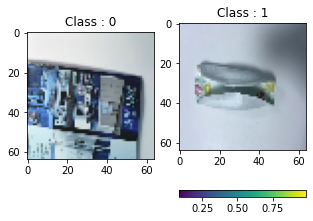

(array([[[[0.96862745, 0.96862745, 0.96862745],
          [0.95686275, 0.95686275, 0.95686275],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          ...,
          [0.7058824 , 0.7529412 , 0.76862746],
          [0.70980394, 0.75686276, 0.77254903],
          [0.7058824 , 0.7529412 , 0.76862746]],
 
         [[0.9647059 , 0.9647059 , 0.9647059 ],
          [0.95686275, 0.95686275, 0.95686275],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          ...,
          [0.7058824 , 0.7529412 , 0.76862746],
          [0.7058824 , 0.7529412 , 0.76862746],
          [0.7019608 , 0.7490196 , 0.7647059 ]],
 
         [[0.95686275, 0.95686275, 0.95686275],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          ...,
          [0.7058824 , 0.7529412 , 0.76862746],
          [0.7058824 , 0.7529412 , 0.76862746],
          [0.7019608 , 0.7490196 , 0.7647059 ]],
 
         ...,
 
         [[0.54509807, 0.65882355, 0.69411767],
          [0.66666

In [9]:


def load_dataset(pth):
  #open file
  
  fname = 'processed_datasets/' +get_end_slash(pth)
  hf= h5py.File(fname,'r')

  #load X, y and y_one_hot from file

  X = hf['X'][()]
  y = hf['y'][()]
  y_one_hot = hf['y_one_hot'][()]
  #load the classes from the current train directory

  classes = get_class_list()
   #close the file
  print('the next outputs are going to be displaying the data')
  display_data(X,y)
  hf.close()
  return (X,y, y_one_hot, classes)

load_dataset(train_dir)
